In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np

In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
len(X_train)

60000

In [5]:
len(X_test)

10000

In [6]:
X_train[0].shape

(28, 28)

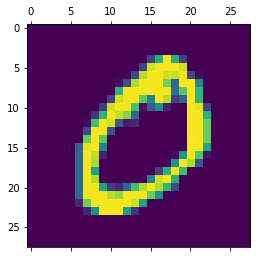

In [7]:
plt.matshow(X_train[1])

In [8]:
y_train[1]

0

In [9]:
X_train.shape

(60000, 28, 28)

In [10]:
X_train = X_train/255
X_test = X_test/255

In [11]:
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_test_flattened = X_test.reshape(len(X_test),28*28)
X_train_flattened.shape

(60000, 784)

In [12]:
X_test_flattened.shape

(10000, 784)

In [13]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 706us/step - loss: 0.4784 - accuracy: 0.8745
Epoch 2/5
1875/1875 [==============================] - 1s 658us/step - loss: 0.3044 - accuracy: 0.9153
Epoch 3/5
1875/1875 [==============================] - 1s 677us/step - loss: 0.2841 - accuracy: 0.9204
Epoch 4/5
1875/1875 [==============================] - 1s 743us/step - loss: 0.2733 - accuracy: 0.9232
Epoch 5/5
1875/1875 [==============================] - 1s 630us/step - loss: 0.2668 - accuracy: 0.9257


In [14]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 604us/step - loss: 0.2728 - accuracy: 0.9218


[0.27279382944107056, 0.9218000173568726]

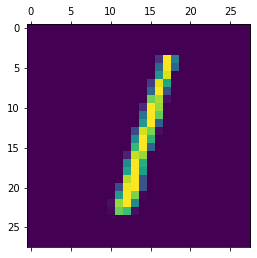

In [15]:
plt.matshow(X_test[2])

In [16]:
y_pred = model.predict(X_test_flattened)
y_pred[2]

array([3.6185980e-04, 9.9350756e-01, 6.5378439e-01, 2.9259324e-01,
       1.9330472e-02, 8.0146641e-02, 1.9521967e-01, 1.1053097e-01,
       2.9487723e-01, 4.4320703e-02], dtype=float32)

In [17]:
np.argmax(y_pred[2])

1

In [18]:
y_pred_labels = [np.argmax(i) for i in y_pred]
y_pred_labels[2]

1

In [19]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 963,    0,    2,    2,    0,    4,    6,    2,    1,    0],
       [   0, 1118,    3,    2,    0,    1,    4,    2,    5,    0],
       [   8,    9,  936,   17,    9,    2,   13,    9,   25,    4],
       [   4,    0,   22,  928,    0,   17,    2,   11,   16,   10],
       [   1,    2,    5,    1,  897,    0,   14,    4,    6,   52],
       [  10,    3,    4,   44,    9,  765,   21,    6,   22,    8],
       [  13,    3,    6,    1,    7,    9,  917,    2,    0,    0],
       [   1,    6,   25,    6,    6,    1,    0,  945,    2,   36],
       [  12,   15,    9,   35,    9,   36,   14,   11,  813,   20],
       [  12,    7,    1,    9,   15,    6,    0,   21,    2,  936]])>

Text(0.5, 69.0, 'predicted')

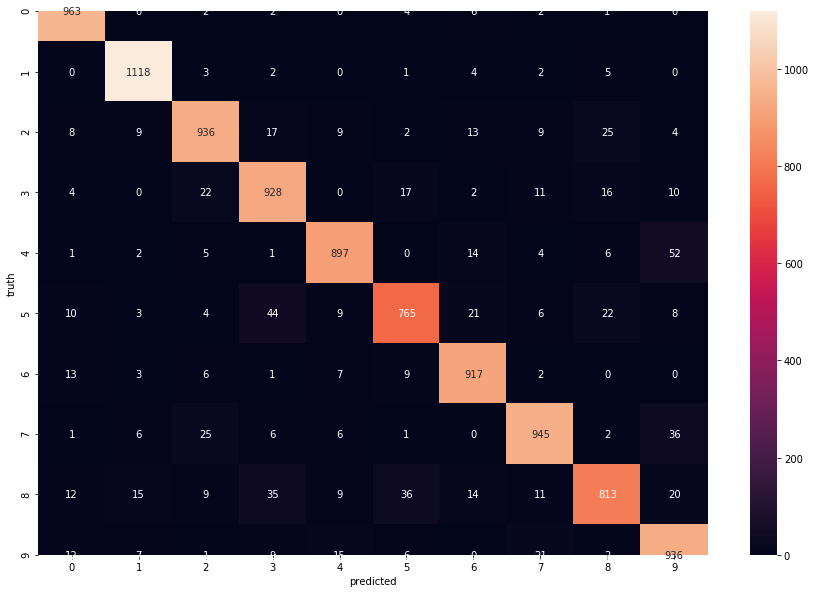

In [20]:
import seaborn as sns
plt.figure(figsize=(15,10))
sns.heatmap(cm,annot=True,fmt='d')
plt.ylabel('truth')
plt.xlabel('predicted')

In [21]:
#Creating neural network with one hidden layer

In [22]:
model1 = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model1.compile(
    metrics=['accuracy'],
    optimizer='adam',
    loss='sparse_categorical_crossentropy'
)

model1.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2713 - accuracy: 0.9240
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1252 - accuracy: 0.9635
Epoch 3/5
1875/1875 [==============================] - 2s 971us/step - loss: 0.0881 - accuracy: 0.9737
Epoch 4/5
1875/1875 [==============================] - 2s 946us/step - loss: 0.0680 - accuracy: 0.9791
Epoch 5/5
1875/1875 [==============================] - 2s 962us/step - loss: 0.0544 - accuracy: 0.9829


In [23]:
model1.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 809us/step - loss: 0.0922 - accuracy: 0.9718


[0.09222838282585144, 0.9718000292778015]

In [24]:
y_predict = model1.predict(X_test_flattened)
y_predict[2]

array([2.31683254e-04, 9.96095419e-01, 1.18609905e-01, 2.70253718e-02,
       1.33269131e-02, 6.73240423e-03, 1.44208968e-02, 2.62383074e-01,
       3.83406103e-01, 4.43527102e-03], dtype=float32)

In [25]:
y_predict_labels = [np.argmax(i) for i in y_predict]
y_predict_labels[2]

1

In [26]:
cm1 = tf.math.confusion_matrix(labels=y_test,predictions=y_predict_labels)
cm1

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 956,    0,    8,    0,    1,    2,    6,    3,    3,    1],
       [   0, 1125,    4,    0,    0,    0,    1,    0,    5,    0],
       [   0,    3, 1016,    1,    1,    0,    1,    5,    5,    0],
       [   0,    1,   10,  989,    1,    0,    0,    3,    3,    3],
       [   0,    0,    1,    0,  956,    0,    5,    2,    2,   16],
       [   1,    1,    1,   38,    1,  824,   13,    0,    9,    4],
       [   2,    4,    2,    1,    3,    1,  944,    0,    1,    0],
       [   0,    5,   14,    6,    2,    0,    0,  992,    1,    8],
       [   2,    1,    7,    9,    6,    1,    6,    3,  935,    4],
       [   1,    5,    2,    8,    8,    0,    0,    3,    1,  981]])>

Text(0.5, 69.0, 'predicted')

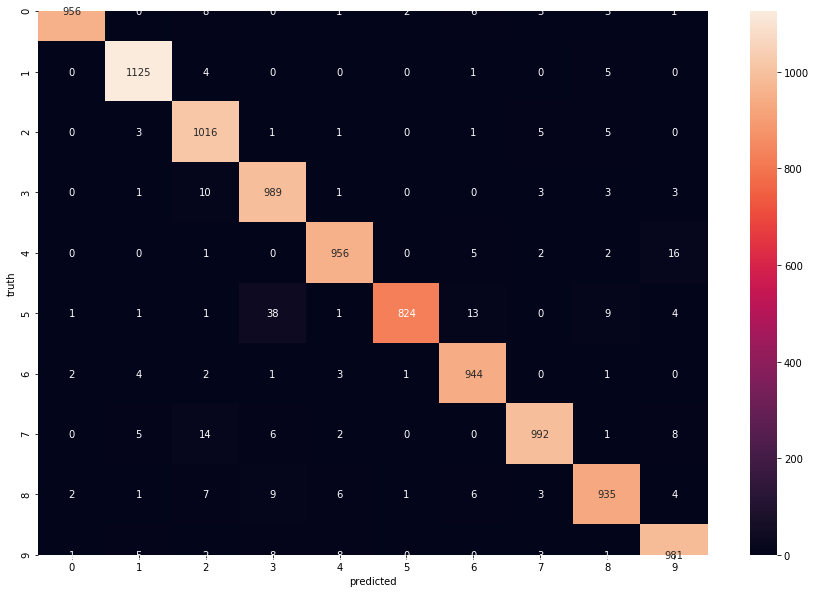

In [27]:
import seaborn as sns
plt.figure(figsize=(15,10))
sns.heatmap(cm1,annot=True,fmt='d')
plt.ylabel('truth')
plt.xlabel('predicted')

In [29]:
#Creating neural network using flatten function from keras

model1 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model1.compile(
    metrics=['accuracy'],
    optimizer='adam',
    loss='sparse_categorical_crossentropy'
)

model1.fit(X_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2761 - accuracy: 0.9213
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1223 - accuracy: 0.9633
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0847 - accuracy: 0.9748
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0643 - accuracy: 0.9801
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0504 - accuracy: 0.9849
